In [26]:
import os
import pandas as pd
import requests
import matplotlib.pyplot as plt
import talib.abstract as ta
from functools import reduce

In [104]:
start_time=1642680000000
end_time=1643544000000
API_KEY='24uzTdYFWlpEvN9yCrOX3WVYskr'

In [106]:
req_oi=requests.get('https://api.glassnode.com/v1/metrics/derivatives/futures_funding_rate_perpetual_all', 
        params={'a': 'BTC', 'interval': '1h','s':start_time,'u':end_time, 'f': 'JSON',
        'api_key': API_KEY,'timestemp_format':'unix'})# 'startTime': start_time, 'endTime':end_time})
print(req_oi.text)
df_oi=pd.read_json(req_oi.text,convert_dates=['timestamp'])
df_oi.head()
df_oi.columns=['symbol','sumOpenInterest','sumOpenInterestValue','time']
print(df_oi.shape)
print(df_oi.time.min(),df_oi.time.max())
df_oi.head()
#plt.plot(df_oi.timestamp,df_oi.sumOpenInterest)

this asset is forbidden for endpoint



ValueError: Unexpected character found when decoding 'true'

In [107]:
req_oi=requests.get('https://fapi.binance.com/futures/data/openInterestHist', 
        params={'symbol': 'BTCUSDT', 'period': '4h','limit':500})# 'startTime': start_time, 'endTime':end_time})
df_oi=pd.read_json(req_oi.text,convert_dates=['timestamp'])
df_oi.head()
df_oi.columns=['symbol','sumOpenInterest','sumOpenInterestValue','time']
print(df_oi.shape)
print(df_oi.time.min(),df_oi.time.max())
df_oi.head()
#plt.plot(df_oi.timestamp,df_oi.sumOpenInterest)

(186, 4)
2022-01-10 20:00:00 2022-02-10 16:00:00


,symbol,sumOpenInterest,sumOpenInterestValue,time
0,BTCUSDT,75910.231,3.133105e+09,2022-01-10 20:00:00
1,BTCUSDT,76552.596,3.200133e+09,2022-01-11 00:00:00
2,BTCUSDT,75920.333,3.207634e+09,2022-01-11 04:00:00
3,BTCUSDT,77326.135,3.261936e+09,2022-01-11 08:00:00
4,BTCUSDT,77461.857,3.239852e+09,2022-01-11 12:00:00


In [108]:
req_price=requests.get('https://fapi.binance.com/fapi/v1/markPriceKlines', 
        params={'symbol': 'BTCUSDT', 'interval': '4h', 'limit':100})# 'startTime': start_time, 'endTime': end_time})
df_pr=pd.read_json(req_price.text,convert_dates=[0])[[0,2]]
df_pr.columns=['time','close_price']
print(df_pr.shape)
print(df_pr.time.min(),df_pr.time.max())
df_pr.head()

(100, 2)
2022-01-25 04:00:00 2022-02-10 16:00:00


,time,close_price
0,2022-01-25 04:00:00,36480.00
1,2022-01-25 08:00:00,36777.43
2,2022-01-25 12:00:00,37137.92
3,2022-01-25 16:00:00,37509.60
4,2022-01-25 20:00:00,37080.86


In [109]:
req_fr=requests.get('https://fapi.binance.com/fapi/v1/fundingRate', 
        params={'symbol': 'BTCUSDT', 'interval': '4h', 'limit':100})# 'startTime': 1643732695000, 'endTime':1644510295000,
df_fr=pd.read_json(req_fr.text, convert_dates=['fundingTime'])
df_fr.columns=['symbol','time','funding_rate']
print(df_fr.shape)
print(df_fr.time.min(),df_fr.time.max())
df_fr.head()

(100, 3)
2022-01-08 16:00:00 2022-02-10 16:00:00.006000


,symbol,time,funding_rate
0,BTCUSDT,2022-01-08 16:00:00.000,0.0001
1,BTCUSDT,2022-01-09 00:00:00.003,0.0001
2,BTCUSDT,2022-01-09 08:00:00.000,0.0001
3,BTCUSDT,2022-01-09 16:00:00.000,0.0001
4,BTCUSDT,2022-01-10 00:00:00.000,0.0001


In [110]:
data_frames=[df_oi,df_pr,df_fr]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['time'],
                                            how='inner'), data_frames)
df_merged.index=df_merged.time
df_merged.drop(['symbol_x','symbol_y','time'],axis=1, inplace=True)
df_merged.shape
                        

(20, 4)

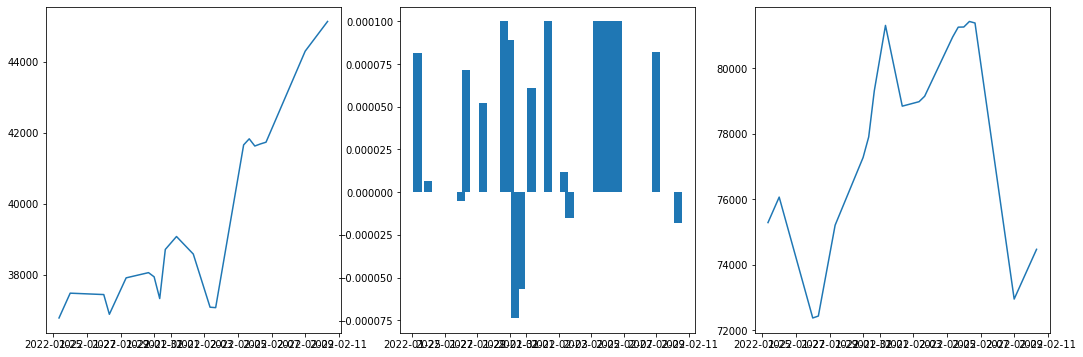

In [111]:
f,axs=plt.subplots(1,3,figsize=(18,6))
axs[0].plot(df_merged.index,df_merged.close_price)
axs[1].bar(df_merged.index,df_merged.funding_rate,width=.5)
axs[2].plot(df_merged.index,df_merged.sumOpenInterest)


In [112]:
df_merged

,sumOpenInterest,sumOpenInterestValue,close_price,funding_rate
time,,,,
2022-01-25 08:00:00,75290.130,2.713451e+09,36777.430000,0.000081
2022-01-26 00:00:00,76068.031,2.809407e+09,37476.990000,0.000007
2022-01-28 00:00:00,72380.226,2.687923e+09,37437.504415,-0.000005
2022-01-28 08:00:00,72438.625,2.664711e+09,36881.010000,0.000072
2022-01-29 08:00:00,75211.354,2.845075e+09,37908.784026,0.000052
2022-01-30 16:00:00,76864.835,2.916417e+09,38055.710000,0.000100
2022-01-31 00:00:00,77276.883,2.927654e+09,37938.000000,0.000089
2022-01-31 08:00:00,77903.336,2.890257e+09,37324.975000,-0.000074
2022-01-31 16:00:00,79308.941,2.988756e+09,38709.666999,-0.000056
